- Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
delayed_flights = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\DelayedFlights.csv', sep=',')
delayed_flights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
delayed_flights.drop(columns='Unnamed: 0', inplace=True)

Abans que res, eliminarem la variable Year ja que tots els vols del dataset son del 2008 i ens sembla redundant.

In [4]:
delayed_flights.drop(columns='Year', inplace=True)

A continuació, farem neteja de valors nuls.

Observem que els vols cancelats produeixen una gran quantitat de null values a diferents variables. Pensem que lo millor serà imputar aquestos valors nuls per 0.

In [5]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [6]:
delayed_flights[delayed_flights.Cancelled == 1].isna().sum() / len(delayed_flights[delayed_flights.Cancelled == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime              100.000000
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.000000
ActualElapsedTime    100.000000
CRSElapsedTime         0.000000
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn               100.000000
TaxiOut               71.879937
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [7]:
delayed_flights[delayed_flights.Cancelled == 1] = delayed_flights[delayed_flights.Cancelled == 1].fillna(0)

Sembla que els null values de les variables CarrierDelay, WeatherDelay, etc. están relacionats amb ArrDelay, és a dir, que quan el retràs no supera els 14 minuts, no es recullen valors. En aquest cas, creiem que serà convenient imputar-los per 0.

In [8]:
delayed_flights[delayed_flights.CarrierDelay.isna()].ArrDelay.max()

14.0

In [9]:
indices = delayed_flights[delayed_flights.ArrDelay < 15][['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].index.values

In [10]:
delayed_flights.iloc[indices, -5:] = delayed_flights.iloc[indices, -5:].fillna(0)

Sembla que els vols desviats també afecten als valors nuls d'altres variables. Així que els imputarem de la mateixa forma que els cancelats.

In [11]:
delayed_flights[delayed_flights.Diverted == 1].isna().sum() / len(delayed_flights[delayed_flights.Diverted == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime               83.531081
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.025793
ActualElapsedTime    100.000000
CRSElapsedTime         2.553521
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn                83.531081
TaxiOut                0.000000
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [12]:
delayed_flights[delayed_flights.Diverted == 1] = delayed_flights[delayed_flights.Diverted == 1].fillna(0)

In [13]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000155
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
ArrDelay             0.000000
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
Cancelled            0.000000
CancellationCode     0.000000
Diverted             0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
SecurityDelay        0.000000
LateAircraftDelay    0.000000
dtype: float64

Per acabar, hem decidit imputar els valors nuls de TailNum per la moda.

In [14]:
delayed_flights.TailNum.fillna(delayed_flights.TailNum.mode()[0], inplace=True)

In [15]:
delayed_flights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Ara, separem entre train i test.

In [16]:
train, test = train_test_split(delayed_flights, test_size=0.33)

In [17]:
train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1734432,12,4,4,2134.0,2120,2229.0,2220,WN,3598,N797MX,...,3.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
886323,6,6,5,1905.0,1850,2139.0,2140,WN,3682,N605SW,...,4.0,7.0,0,N,0,0.0,0.0,0.0,0.0,0.0
511484,3,24,1,1838.0,1800,1957.0,1920,MQ,4806,N705AE,...,7.0,32.0,0,N,0,0.0,0.0,0.0,0.0,37.0
911826,6,24,2,746.0,740,922.0,925,WN,1596,N415WN,...,5.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1284144,8,20,3,1741.0,1725,1845.0,1840,WN,1806,N508SW,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908084,6,22,7,1234.0,1225,1258.0,1255,WN,179,N914WN,...,2.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
302306,2,27,3,1106.0,1050,1340.0,1327,FL,669,N892AT,...,7.0,30.0,0,N,0,0.0,0.0,0.0,0.0,0.0
642133,4,7,1,1747.0,1702,1940.0,1849,US,140,N812AW,...,6.0,14.0,0,N,0,45.0,0.0,6.0,0.0,0.0
1745381,12,16,2,1722.0,1615,1816.0,1725,WN,2701,N261WN,...,7.0,5.0,0,N,0,7.0,0.0,0.0,0.0,44.0


In [18]:
test

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1629821,11,6,4,1907.0,1645,2131.0,1920,WN,1171,N257WN,...,17.0,7.0,0,N,0,0.0,0.0,131.0,0.0,0.0
1845360,12,2,2,1259.0,1229,1519.0,1446,EV,5262,N829AS,...,4.0,15.0,0,N,0,0.0,0.0,3.0,0.0,30.0
365530,2,13,3,2303.0,2255,2344.0,2346,CO,1561,N32626,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
768499,5,3,6,655.0,646,822.0,814,YV,7083,N570ML,...,8.0,11.0,0,N,0,0.0,0.0,0.0,0.0,0.0
537009,3,7,5,1506.0,1445,1628.0,1625,AA,1195,N517AA,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,4,29,2,1410.0,1245,1750.0,1628,XE,2447,N16571,...,31.0,10.0,0,N,0,0.0,0.0,82.0,0.0,0.0
1702041,11,26,3,1546.0,1540,1729.0,1705,MQ,4364,N501MQ,...,6.0,28.0,0,N,0,1.0,0.0,18.0,0.0,5.0
1847791,12,15,1,1416.0,1300,1650.0,1525,EV,5472,N723EV,...,13.0,12.0,0,N,0,17.0,0.0,9.0,0.0,59.0
11060,1,12,6,1304.0,1250,1401.0,1355,WN,784,N788SA,...,5.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [19]:
train.shape

(1297627, 28)

In [20]:
test.shape

(639131, 28)

La proporció de cada conjunt és correcta (66%-33%).

In [21]:
round(train.describe(), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,...,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00
mean,6.11,15.76,3.98,1518.62,1467.77,1604.37,1634.27,2184.01,132.81,134.36,...,766.22,6.79,18.24,0.00,0.00,12.34,2.39,9.69,0.06,16.30
std,3.48,8.78,2.00,450.60,424.70,555.85,464.77,1944.76,72.48,71.38,...,574.89,5.30,14.37,0.02,0.06,36.00,17.36,28.12,1.65,35.85
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,-12.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1313.00,1325.00,610.00,80.00,82.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1714.00,1706.00,1543.00,116.00,117.00,...,607.00,5.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1816.00,2030.00,2015.00,3423.00,165.00,165.00,...,998.00,8.00,21.00,0.00,0.00,9.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,776.00,660.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1337.00,392.00,1303.00


In [22]:
round(test.describe(), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,...,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00
mean,6.11,15.75,3.99,1518.37,1466.87,1603.95,1634.14,2184.79,132.57,134.15,...,764.61,6.79,18.20,0.00,0.00,12.38,2.37,9.65,0.06,16.28
std,3.48,8.78,2.00,450.25,424.90,555.61,464.35,1944.58,72.34,71.30,...,573.65,5.24,14.27,0.02,0.06,36.40,17.30,28.02,1.57,35.89
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,-25.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1313.00,1325.00,612.00,80.00,81.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1713.00,1705.00,1544.00,115.00,116.00,...,606.00,5.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2029.00,2014.00,3421.00,164.00,165.00,...,997.00,8.00,21.00,0.00,0.00,10.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9741.00,1114.00,660.00,...,4962.00,200.00,386.00,1.00,1.00,1951.00,1225.00,1357.00,284.00,1316.00


Estadísticament son pràcticament idèntics.

---
- Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [23]:
delayed_flights.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Aplicarem OrdinalEncoder per a les variables ordinals, frequency encoding per a les nominals i estandarditzarem les variables numèriques. Les variables cancelled i diverted son binomials, però no requereixen cap tipus de transformació.

In [24]:
ordinal = ['Month', 'DayofMonth', 'DayOfWeek']
nominal = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
binomial = ['Cancelled', 'Diverted']
numerical = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
            'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [25]:
#train
enc = OrdinalEncoder()
train[ordinal] = enc.fit_transform(train[ordinal])
train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1734432,11.0,3.0,3.0,2134.0,2120,2229.0,2220,WN,3598,N797MX,...,3.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
886323,5.0,5.0,4.0,1905.0,1850,2139.0,2140,WN,3682,N605SW,...,4.0,7.0,0,N,0,0.0,0.0,0.0,0.0,0.0
511484,2.0,23.0,0.0,1838.0,1800,1957.0,1920,MQ,4806,N705AE,...,7.0,32.0,0,N,0,0.0,0.0,0.0,0.0,37.0
911826,5.0,23.0,1.0,746.0,740,922.0,925,WN,1596,N415WN,...,5.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1284144,7.0,19.0,2.0,1741.0,1725,1845.0,1840,WN,1806,N508SW,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908084,5.0,21.0,6.0,1234.0,1225,1258.0,1255,WN,179,N914WN,...,2.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
302306,1.0,26.0,2.0,1106.0,1050,1340.0,1327,FL,669,N892AT,...,7.0,30.0,0,N,0,0.0,0.0,0.0,0.0,0.0
642133,3.0,6.0,0.0,1747.0,1702,1940.0,1849,US,140,N812AW,...,6.0,14.0,0,N,0,45.0,0.0,6.0,0.0,0.0
1745381,11.0,15.0,1.0,1722.0,1615,1816.0,1725,WN,2701,N261WN,...,7.0,5.0,0,N,0,7.0,0.0,0.0,0.0,44.0


In [26]:
#test
enc = OrdinalEncoder()
test[ordinal] = enc.fit_transform(test[ordinal])
test

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1629821,10.0,5.0,3.0,1907.0,1645,2131.0,1920,WN,1171,N257WN,...,17.0,7.0,0,N,0,0.0,0.0,131.0,0.0,0.0
1845360,11.0,1.0,1.0,1259.0,1229,1519.0,1446,EV,5262,N829AS,...,4.0,15.0,0,N,0,0.0,0.0,3.0,0.0,30.0
365530,1.0,12.0,2.0,2303.0,2255,2344.0,2346,CO,1561,N32626,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
768499,4.0,2.0,5.0,655.0,646,822.0,814,YV,7083,N570ML,...,8.0,11.0,0,N,0,0.0,0.0,0.0,0.0,0.0
537009,2.0,6.0,4.0,1506.0,1445,1628.0,1625,AA,1195,N517AA,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,3.0,28.0,1.0,1410.0,1245,1750.0,1628,XE,2447,N16571,...,31.0,10.0,0,N,0,0.0,0.0,82.0,0.0,0.0
1702041,10.0,25.0,2.0,1546.0,1540,1729.0,1705,MQ,4364,N501MQ,...,6.0,28.0,0,N,0,1.0,0.0,18.0,0.0,5.0
1847791,11.0,14.0,0.0,1416.0,1300,1650.0,1525,EV,5472,N723EV,...,13.0,12.0,0,N,0,17.0,0.0,9.0,0.0,59.0
11060,0.0,11.0,5.0,1304.0,1250,1401.0,1355,WN,784,N788SA,...,5.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [27]:
for column in nominal:
    mapping = train[column].value_counts() / len(train)
    train[column] = train[column].map(mapping)
    mapping = test[column].value_counts() / len(test)
    test[column] = test[column].map(mapping)

In [28]:
train[nominal]

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
1734432,0.194822,0.000080,0.000355,0.009944,0.011787,0.999686
886323,0.194822,0.000082,0.000448,0.001635,0.018810,0.999686
511484,0.073293,0.000142,0.000172,0.014556,0.019642,0.999686
911826,0.194822,0.000171,0.000321,0.007976,0.025194,0.999686
1284144,0.194822,0.000147,0.000371,0.030444,0.024256,0.999686
...,...,...,...,...,...,...
908084,0.194822,0.000581,0.000284,0.006059,0.003411,0.999686
302306,0.036983,0.000220,0.000282,0.018791,0.001723,0.999686
642133,0.050953,0.000320,0.000127,0.006117,0.024724,0.999686
1745381,0.194822,0.000247,0.000348,0.012793,0.025194,0.999686


In [29]:
test[nominal]

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
1629821,0.195259,0.000150,0.000349,0.010449,0.015900,0.999648
1845360,0.042412,0.000053,0.000264,0.067568,0.000679,0.999648
365530,0.051492,0.000419,0.000219,0.029230,0.008064,0.999648
768499,0.034603,0.000077,0.000446,0.065260,0.008948,0.999648
537009,0.099474,0.000458,0.000214,0.008430,0.036783,0.999648
...,...,...,...,...,...,...
608299,0.053779,0.000146,0.000253,0.009065,0.028529,0.999648
1702041,0.073245,0.000069,0.000100,0.008430,0.056808,0.999648
1847791,0.042412,0.000196,0.000264,0.001701,0.055676,0.999648
11060,0.195259,0.000319,0.000305,0.027586,0.030746,0.999648


In [30]:
scaler = StandardScaler()
train[numerical] = scaler.fit_transform(train[numerical])
train[numerical]

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1734432,1.365695,1.535743,1.123748,1.260254,-1.073504,-1.041786,-1.028647,-0.583435,-0.547837,-0.990139,-0.714669,-0.225523,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
886323,0.857485,0.900002,0.961833,1.088127,0.292366,0.499335,0.509797,-0.760031,-0.529077,0.533638,-0.525996,-0.782073,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
511484,0.708795,0.782272,0.634406,0.614778,-0.742384,-0.761582,-0.985106,-0.088968,-0.097604,-1.011012,0.040022,0.957145,-0.342801,-0.137906,-0.344556,-0.03525,0.577441
911826,-1.714631,-1.713598,-1.227611,-1.526051,1.975559,2.110507,2.236918,-0.795350,-0.697914,2.193093,-0.337323,-0.642936,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
1284144,0.493527,0.605678,0.432912,0.442651,-0.949334,-0.831633,-0.810943,-0.654073,-0.510317,-0.746613,-0.525996,-0.712505,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908084,-0.631635,-0.571620,-0.623130,-0.816027,-0.673401,-0.621480,-0.520670,-0.689393,-0.641635,-0.414374,-0.903342,-0.573367,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
302306,-0.915700,-0.983674,-0.475608,-0.661113,0.292366,0.317203,0.132443,-0.512797,-0.510317,0.357951,0.040022,0.818008,-0.342801,-0.137906,-0.344556,-0.03525,-0.454765
642133,0.506843,0.551522,0.603822,0.462015,1.382302,1.297916,1.525751,0.158266,0.033714,1.206813,-0.148650,-0.295092,0.907101,-0.137906,-0.131212,-0.03525,-0.454765
1745381,0.451361,0.346672,0.380740,0.195219,-1.087301,-0.901684,-0.956079,0.158266,0.446427,-0.884031,0.040022,-0.921211,-0.148372,-0.137906,-0.344556,-0.03525,0.772723


In [31]:
scaler = StandardScaler()
test[numerical] = scaler.fit_transform(test[numerical])
test[numerical]

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1629821,0.863149,0.419222,0.948601,0.615615,0.158068,0.292483,0.179208,1.563562,1.844289,0.270888,1.949270,-0.784920,-0.340034,-0.136887,4.330928,-0.036851,-0.453610
1845360,-0.576056,-0.559836,-0.152901,-0.405161,0.102773,0.040021,0.193747,-0.157628,-0.245330,0.033809,-0.532210,-0.224256,-0.340034,-0.136887,-0.237187,-0.036851,0.382362
365530,1.742664,1.854859,1.331967,1.533020,-1.265769,-1.166187,-1.158342,-0.772338,-0.655791,-1.088829,-0.532210,-0.644754,-0.340034,-0.136887,-0.344252,-0.036851,-0.453610
768499,-1.917538,-1.931929,-1.407390,-1.766194,-0.629881,-0.647237,-0.576798,-0.596707,-0.637133,-0.619901,0.231322,-0.504588,-0.340034,-0.136887,-0.344252,-0.036851,-0.453610
537009,-0.027470,-0.051479,0.043282,-0.019678,-0.698999,-0.478929,-0.547721,-0.684523,-0.413246,-0.530997,-0.532210,-0.714837,-0.340034,-0.136887,-0.344252,-0.036851,-0.453610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,-0.240686,-0.522180,0.262862,-0.013217,0.379246,0.404688,0.164669,0.702967,0.780822,0.187213,4.621634,-0.574671,-0.340034,-0.136887,2.582197,-0.036851,-0.453610
1702041,0.061370,0.172104,0.225065,0.152605,-0.408702,-0.689314,-0.562260,-0.315696,-0.693105,-0.630361,-0.150444,0.686821,-0.312562,-0.136887,0.298139,-0.036851,-0.314281
1847791,-0.227360,-0.392737,0.082878,-0.235031,0.296305,0.152226,0.310055,0.755657,0.612906,0.049498,1.185738,-0.434505,0.126978,-0.136887,-0.023057,-0.036851,1.190469
11060,-0.476111,-0.510413,-0.365282,-0.601132,-1.044591,-0.969827,-0.940263,-0.631833,-0.543847,-0.921479,-0.341327,-0.644754,-0.340034,-0.136887,-0.344252,-0.036851,-0.453610


---
- Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [32]:
round(train.describe(), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.0,1297627.0,...,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00,1297627.00
mean,5.11,14.76,2.98,-0.00,-0.00,0.00,-0.00,0.08,0.0,0.0,...,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,3.48,8.78,2.00,1.00,1.00,1.00,1.00,0.06,0.0,0.0,...,1.00,1.00,0.02,0.02,0.06,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,-3.37,-3.46,-2.89,-3.52,0.00,0.0,0.0,...,-1.28,-1.27,0.00,0.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
25%,2.00,7.00,1.00,-0.70,-0.78,-0.52,-0.67,0.04,0.0,0.0,...,-0.53,-0.57,0.00,1.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
50%,5.00,15.00,3.00,0.06,0.10,0.20,0.15,0.07,0.0,0.0,...,-0.34,-0.30,0.00,1.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
75%,8.00,22.00,5.00,0.85,0.82,0.77,0.82,0.10,0.0,0.0,...,0.23,0.19,0.00,1.00,0.00,-0.09,-0.14,-0.13,-0.04,0.05
max,11.00,30.00,6.00,1.96,2.10,1.43,1.65,0.19,0.0,0.0,...,44.00,28.09,1.00,1.00,1.00,67.32,77.74,47.20,237.60,35.90


In [33]:
round(test.describe(), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.0,639131.0,...,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00,639131.00
mean,5.11,14.75,2.99,-0.00,-0.00,0.00,0.00,0.08,0.0,0.0,...,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,3.48,8.78,2.00,1.00,1.00,1.00,1.00,0.06,0.0,0.0,...,1.00,1.00,0.02,0.02,0.06,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,-3.37,-3.45,-2.89,-3.52,0.00,0.0,0.0,...,-1.30,-1.28,0.00,0.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
25%,2.00,7.00,1.00,-0.70,-0.78,-0.52,-0.67,0.04,0.0,0.0,...,-0.53,-0.57,0.00,1.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
50%,5.00,15.00,3.00,0.06,0.10,0.20,0.15,0.07,0.0,0.0,...,-0.34,-0.29,0.00,1.00,0.00,-0.34,-0.14,-0.34,-0.04,-0.45
75%,8.00,22.00,5.00,0.85,0.82,0.77,0.82,0.10,0.0,0.0,...,0.23,0.20,0.00,1.00,0.00,-0.07,-0.14,-0.13,-0.04,0.05
max,11.00,30.00,6.00,1.96,2.10,1.43,1.65,0.20,0.0,0.0,...,36.88,25.78,1.00,1.00,1.00,53.26,70.68,48.08,180.79,36.22


Les dades estadístiques segueixen sent pràcticament idèntiques entre train i test.

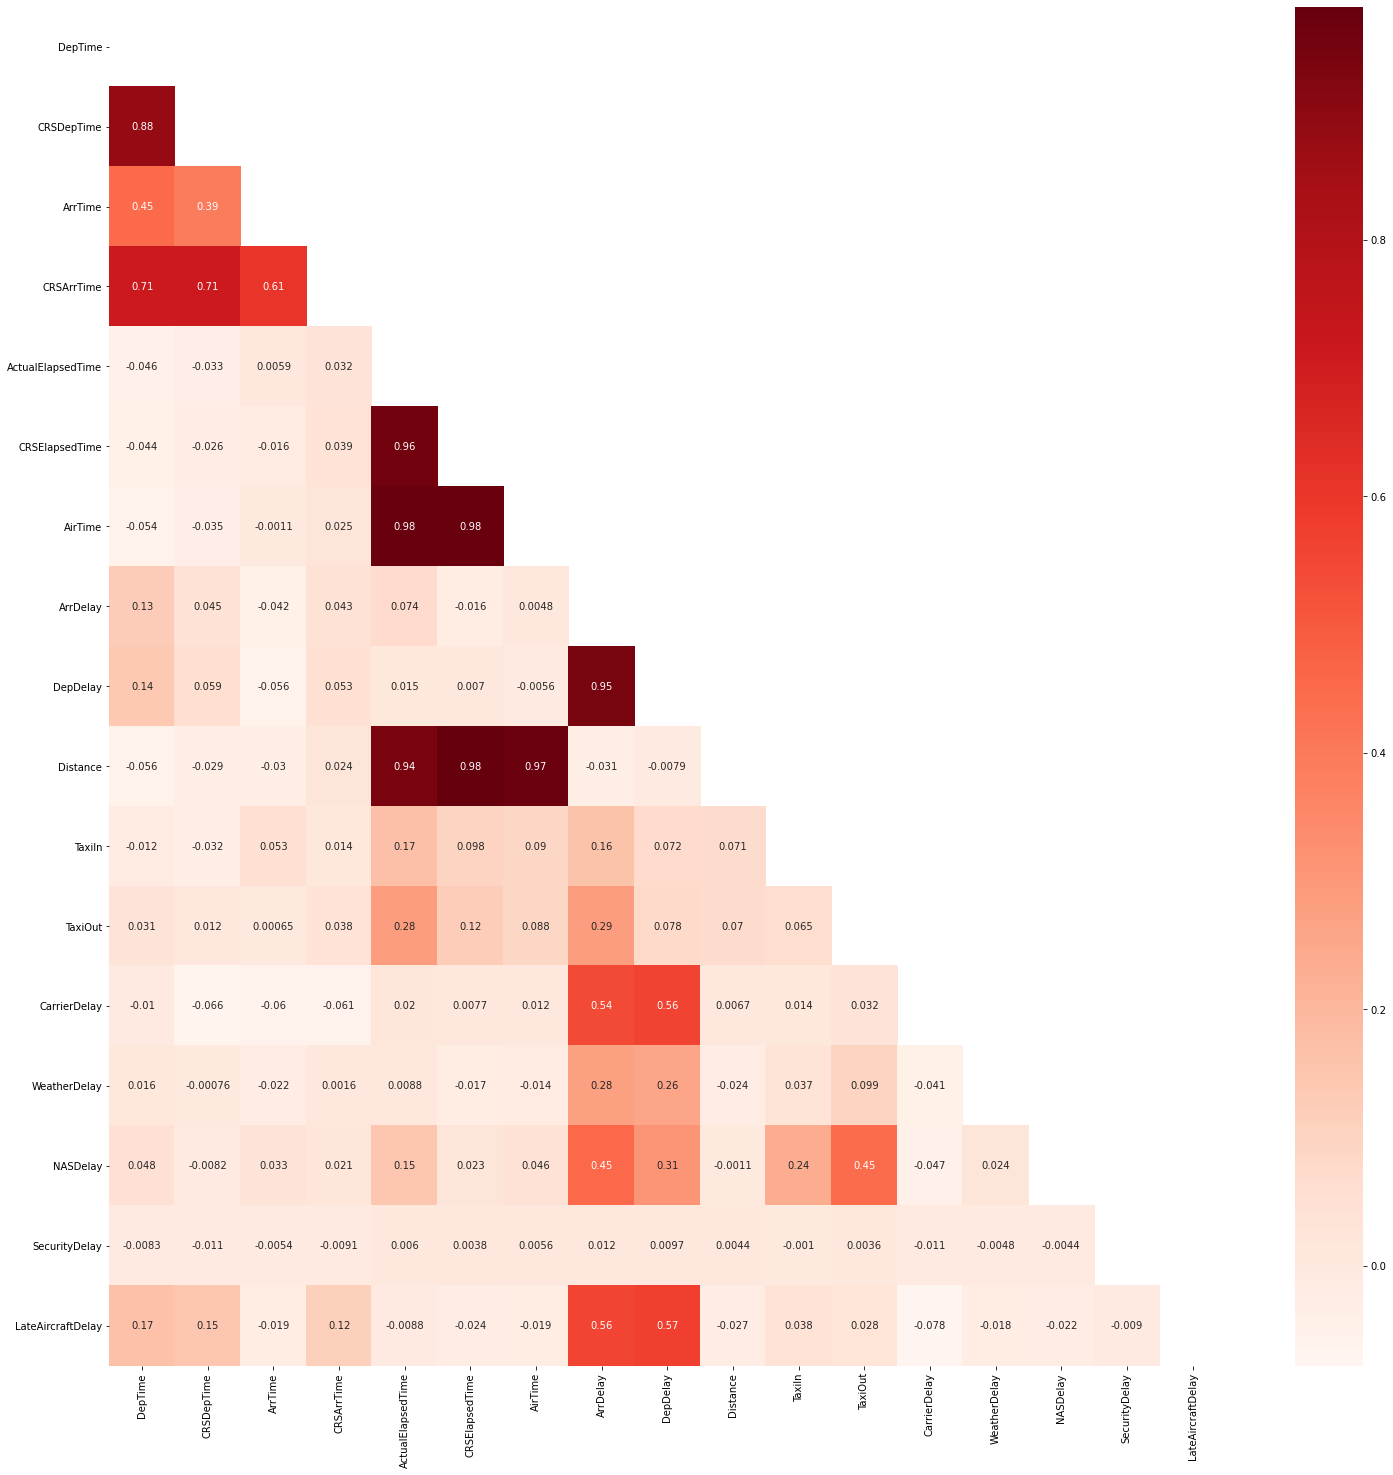

In [34]:
matrix = np.triu(train[numerical].corr())
plt.figure(figsize=(25,25))
fig = sns.heatmap(train[numerical].corr(), annot=True, cmap='Reds', mask=matrix)

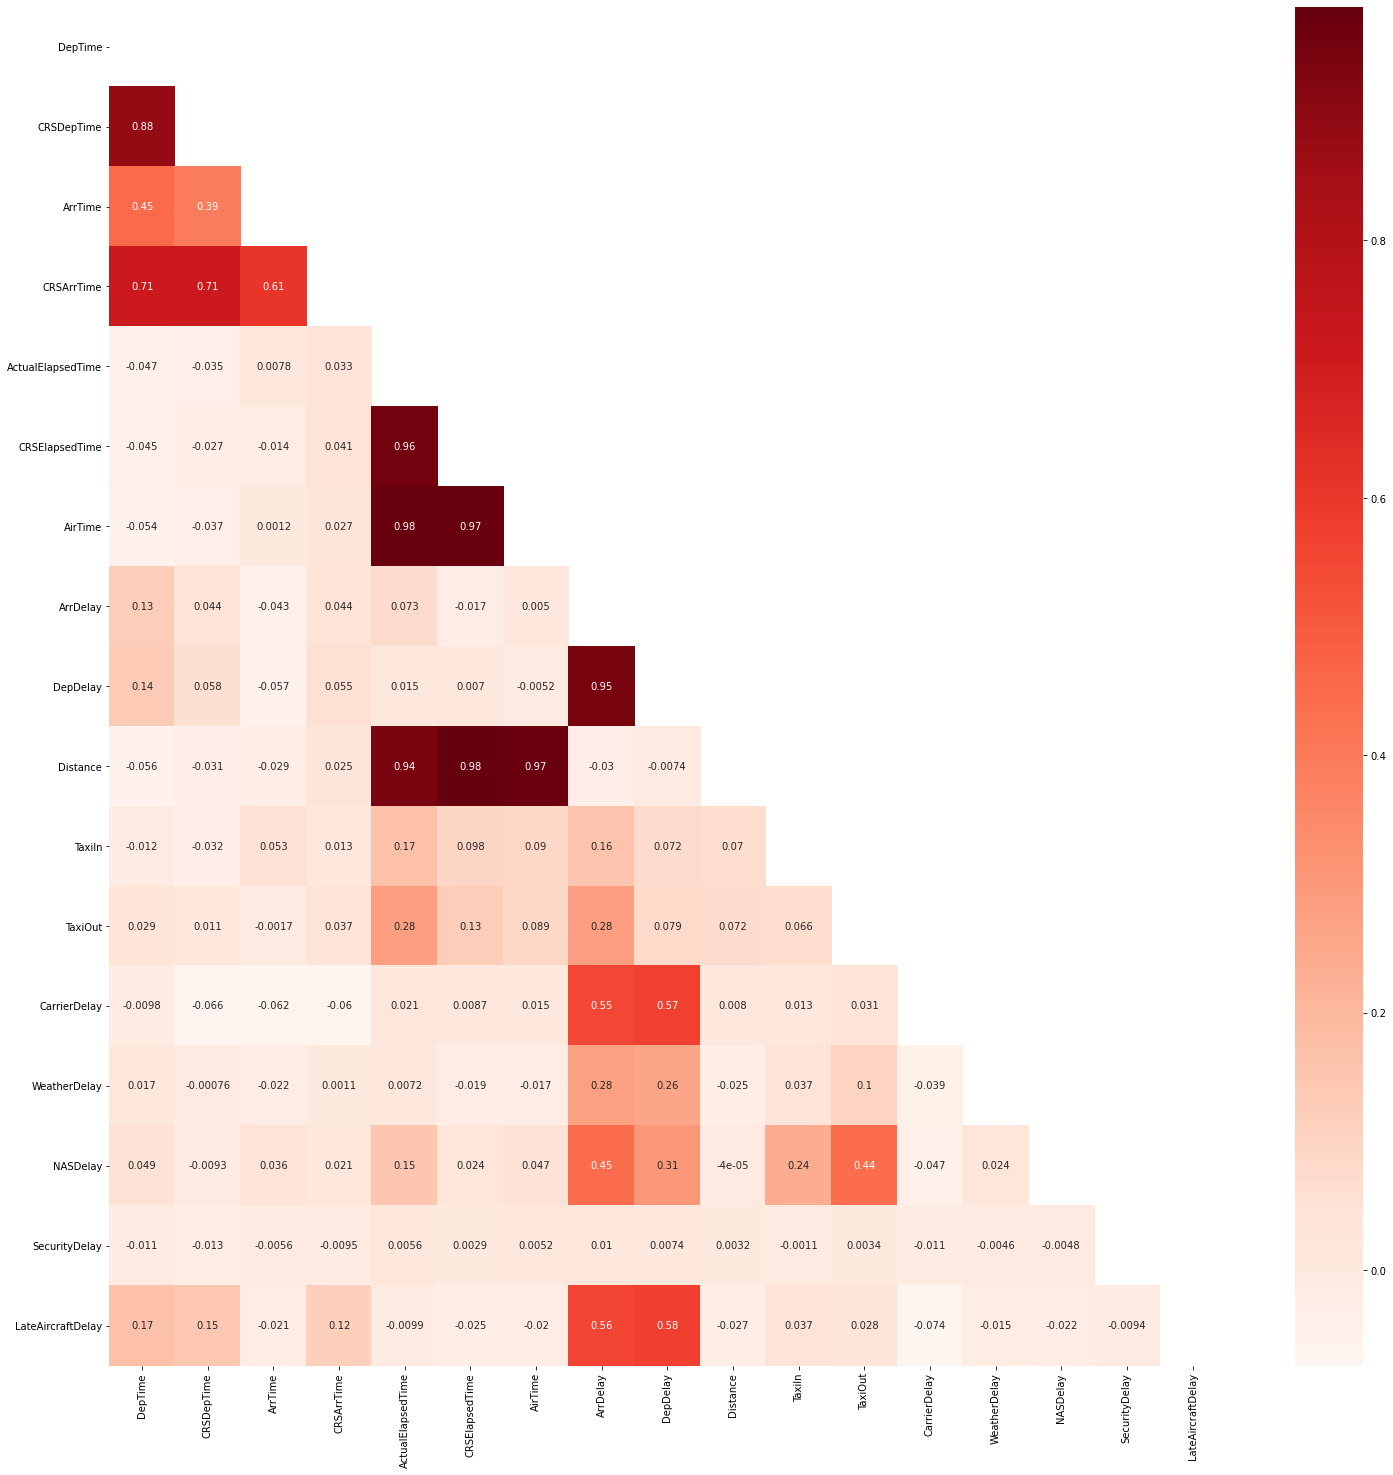

In [35]:
matrix = np.triu(test[numerical].corr())
plt.figure(figsize=(25,25))
fig = sns.heatmap(test[numerical].corr(), annot=True, cmap='Reds', mask=matrix)

La matriu de correlacions és pràcticament la mateixa.

<AxesSubplot:xlabel='Diverted', ylabel='count'>

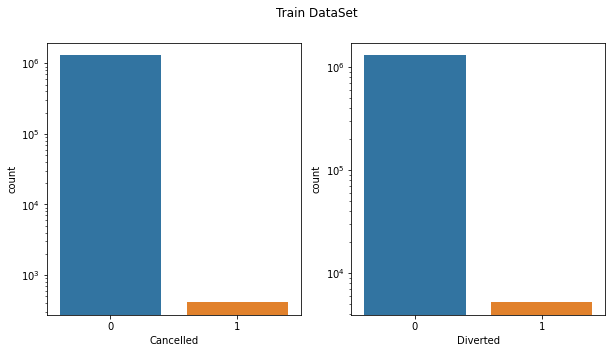

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

fig.suptitle('Train DataSet')
axs[0].set(yscale="log")
axs[1].set(yscale="log")
sns.countplot(x=train.Cancelled, ax=axs[0])
sns.countplot(x=train.Diverted, ax=axs[1])

<AxesSubplot:xlabel='Diverted', ylabel='count'>

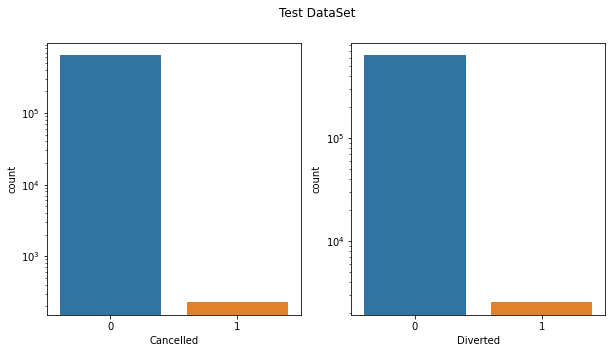

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

fig.suptitle('Test DataSet')
axs[0].set(yscale="log")
axs[1].set(yscale="log")
sns.countplot(x=test.Cancelled, ax=axs[0])
sns.countplot(x=test.Diverted, ax=axs[1])

La proporció de vols cancelats i desviats també és idèntica en els dos conjunts.

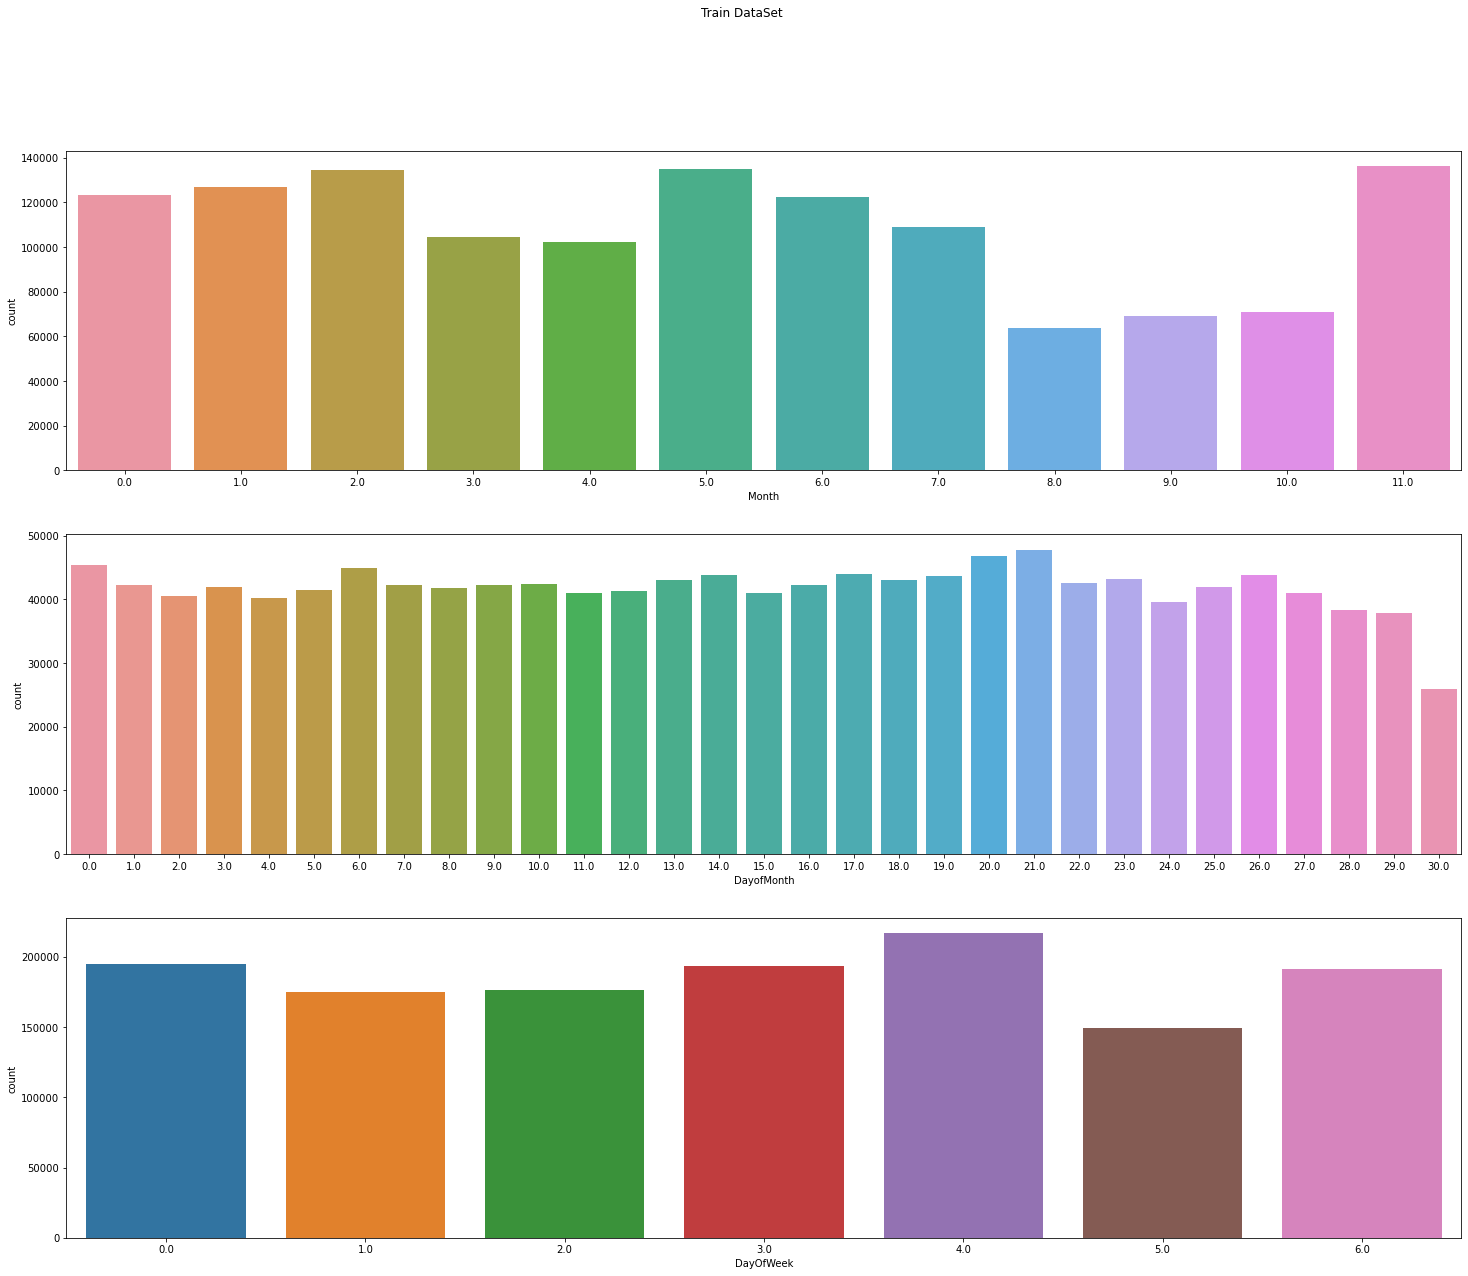

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

fig.suptitle('Train DataSet')
for i in range(0, len(ordinal)):
    sns.countplot(x=train[ordinal[i]], ax=axs[i])

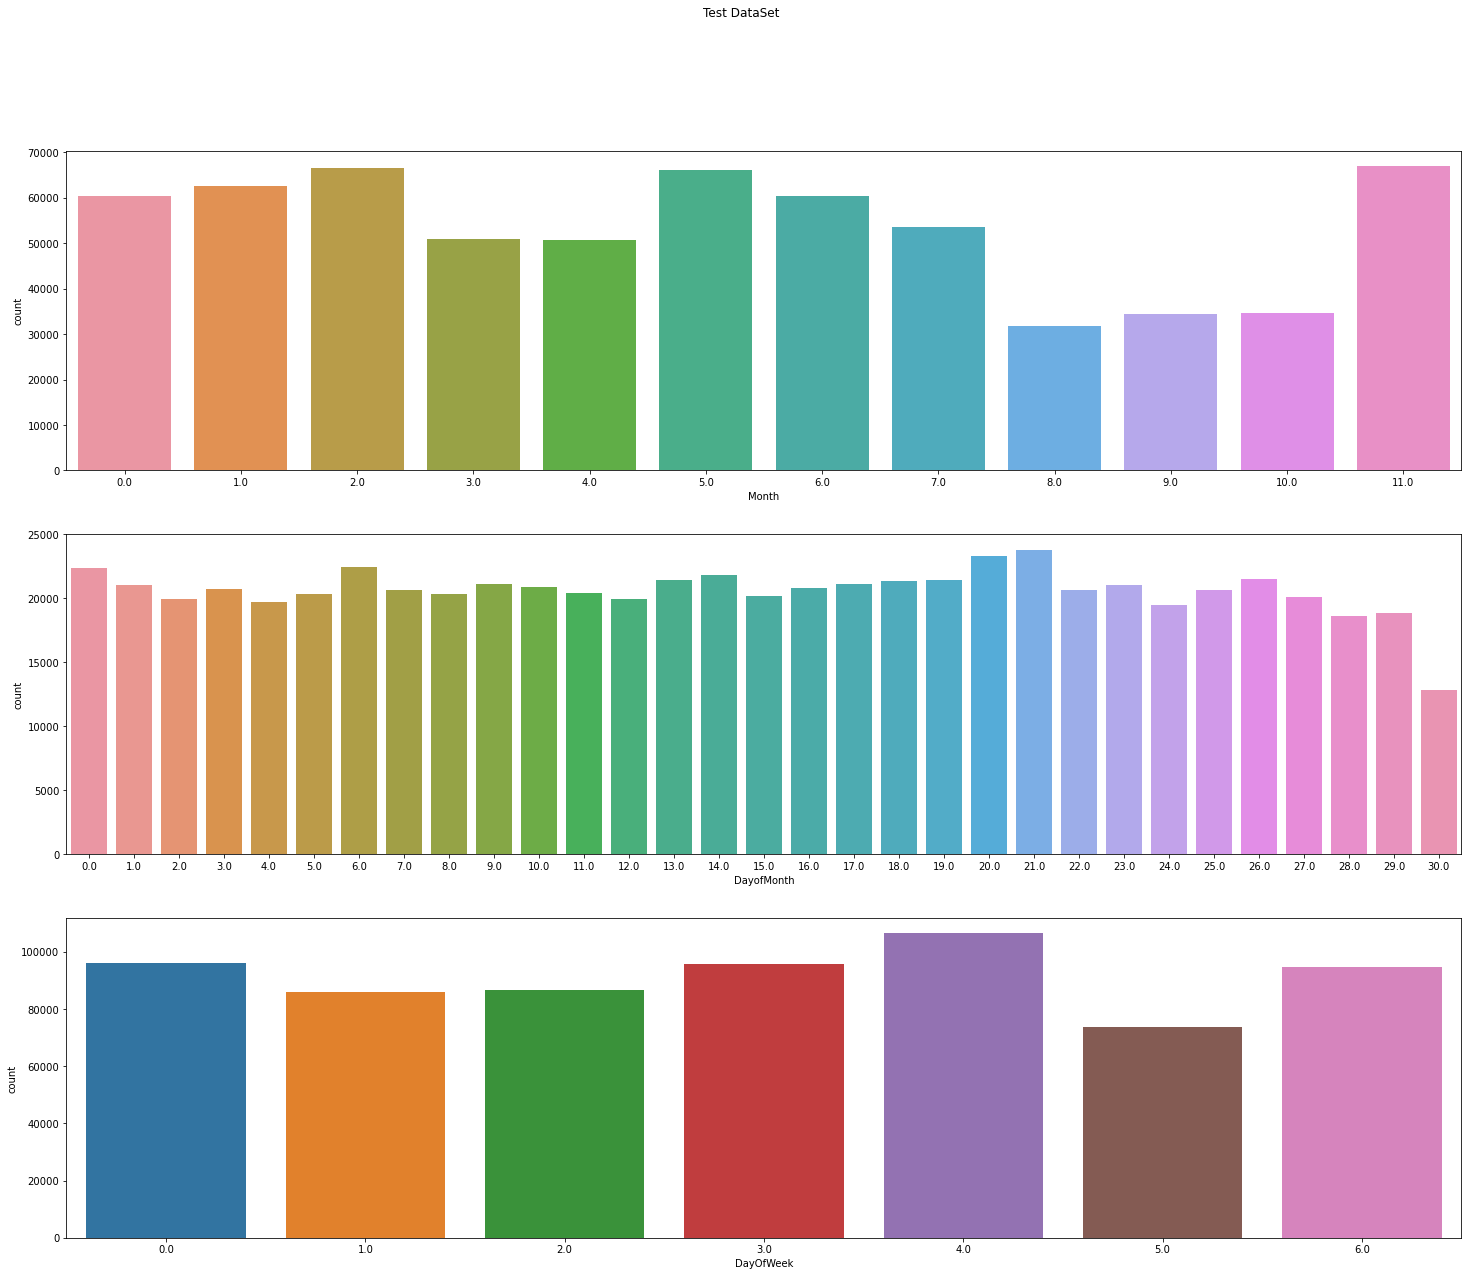

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

fig.suptitle('Test DataSet')
for i in range(0, len(ordinal)):
    sns.countplot(x=test[ordinal[i]], ax=axs[i])

Train i test segueixen mantenint una mateixa distribució per a aquestes variables.

Als dos conjunts podem observar, en primer lloc, que els mesos en els que hi han més vols son al juny i al desembre, i menys al setembre, octubre i novembre. En segon lloc, que el dia del mes més frequent sol ser el 21 del mes, i el que menys el 30. Finalment, el dia de la setmana amb més vols ha sigut el divendres i el que menys el dissabte. 

A continuació, podem veure que les variables numèriques segueixen mantenint una distribució quasi idèntica.

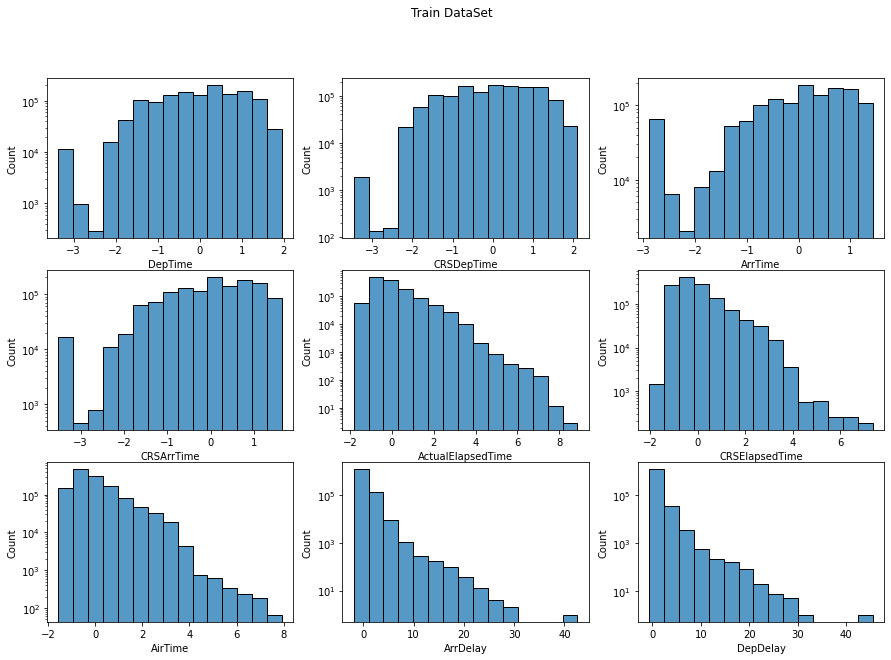

In [51]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Train DataSet')

count = 0

for i in range(0, 3):
    sns.histplot(x=train[numerical[i+count]], bins=15, ax=axs[i, 0]).set(yscale="log")
    count+=1
    sns.histplot(x=train[numerical[i+count]], bins=15, ax=axs[i, 1]).set(yscale="log")
    count+=1
    sns.histplot(x=train[numerical[i+count]], bins=15, ax=axs[i, 2]).set(yscale="log")

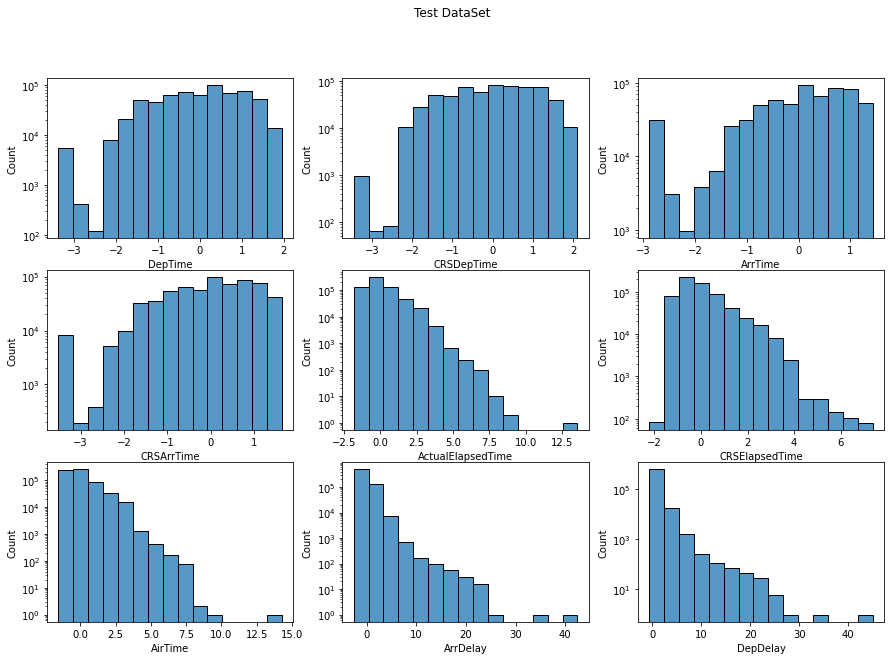

In [49]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Test DataSet')

count = 0

for i in range(0, 3):
    sns.histplot(x=test[numerical[i+count]], bins=15, ax=axs[i, 0]).set(yscale="log")
    count+=1
    sns.histplot(x=test[numerical[i+count]], bins=15, ax=axs[i, 1]).set(yscale="log")
    count+=1
    sns.histplot(x=test[numerical[i+count]], bins=15, ax=axs[i, 2]).set(yscale="log")

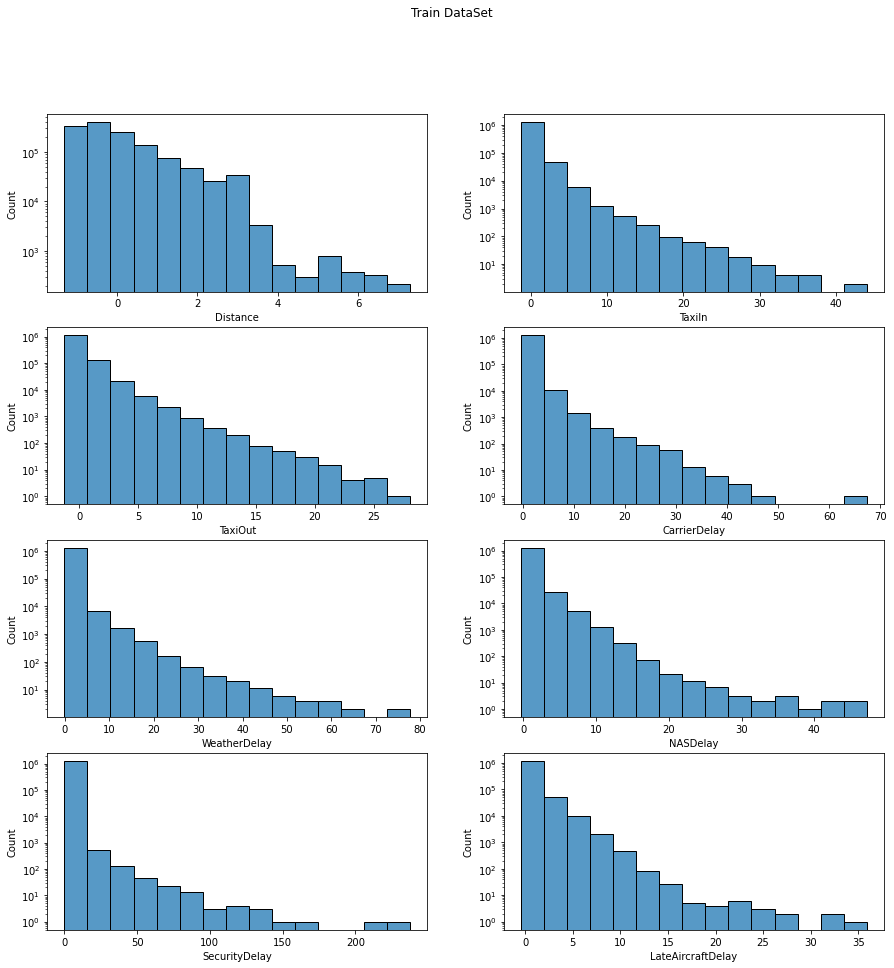

In [50]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.suptitle('Train DataSet')

count = 9

for i in range(0, 4):
    sns.histplot(x=train[numerical[i+count]], bins=15, ax=axs[i, 0]).set(yscale="log")
    count+=1
    sns.histplot(x=train[numerical[i+count]], bins=15, ax=axs[i, 1]).set(yscale="log")

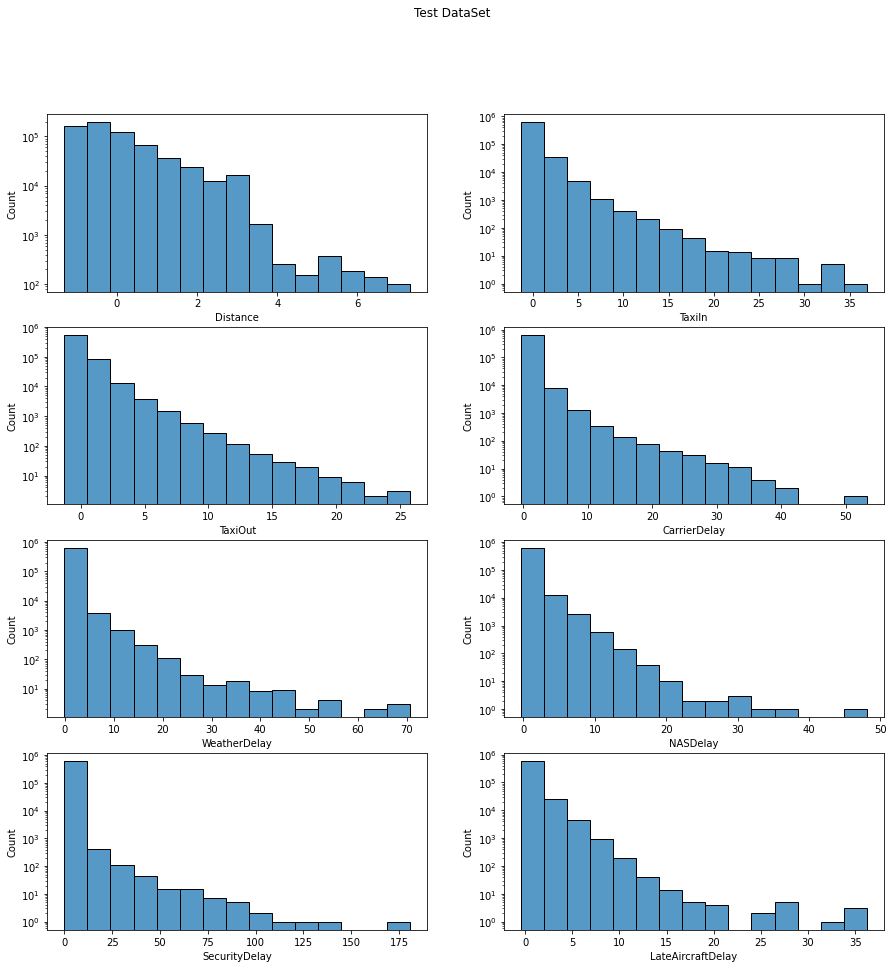

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.suptitle('Test DataSet')

count = 9

for i in range(0, 4):
    sns.histplot(x=test[numerical[i+count]], bins=15, ax=axs[i, 0]).set(yscale="log")
    count+=1
    sns.histplot(x=test[numerical[i+count]], bins=15, ax=axs[i, 1]).set(yscale="log")